In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
def hypocycloid(n_list, cols=3, R=1, resolution=1000):
    num_plots = len(n_list)
    rows = (num_plots + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axs = axs.flatten()

    for i, n in enumerate(n_list):
        ax = axs[i]

        # Draw the current hypocycloid
        r = R / n  # Small circle's radius (ensures N cusps)
        t = np.linspace(0, 2 * np.pi, resolution)  # Parameter

        # Hypocycloid parametric equations
        x = (R - r) * np.cos(t) + r * np.cos(((R - r) / r) * t)
        y = (R - r) * np.sin(t) - r * np.sin(((R - r) / r) * t)

        # Outer fixed circle
        theta = np.linspace(0, 2 * np.pi, resolution)
        circle_x = R * np.cos(theta)
        circle_y = R * np.sin(theta)

        # Plot the outer circle and the hypocycloid
        ax.plot(circle_x, circle_y, 'b-', label="Outer Circle")
        ax.plot(x, y, linewidth=2, label=f"{n}")

        # Draw the cycloids that divide the current n
        for divisor in n_list:
            if divisor < n and n % divisor == 0:
                r_divisor = R / divisor
                x_divisor = (R - r_divisor) * np.cos(t) + r_divisor * np.cos(((R - r_divisor) / r_divisor) * t)
                y_divisor = (R - r_divisor) * np.sin(t) - r_divisor * np.sin(((R - r_divisor) / r_divisor) * t)
                ax.plot(x_divisor, y_divisor, linewidth=1, linestyle='--', label=f"{divisor}")

        ax.axis("equal")
        ax.set_title(f"{n}-Point Hypocycloid", fontsize=8)
        ax.legend(prop={'size': 7})

    # Hide and delete any unused subplots
    for j in range(len(n_list), len(axs)):
        fig.delaxes(axs[j])

    plt.show()


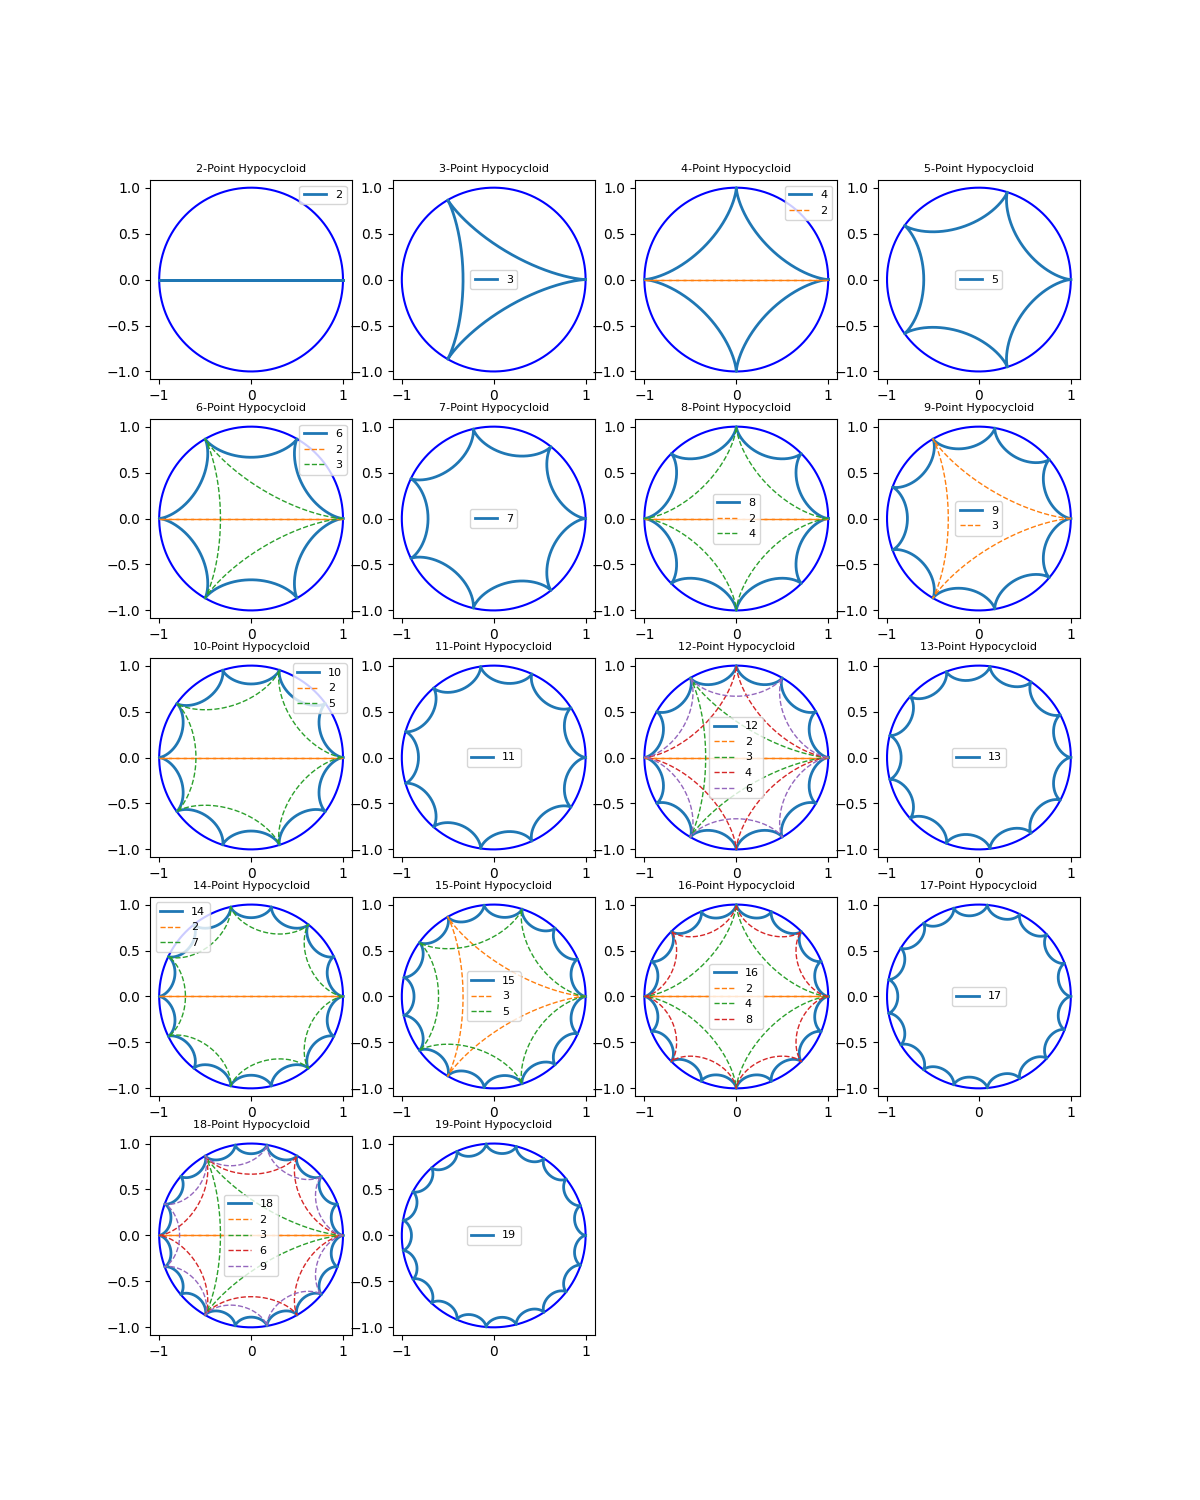

In [3]:
hypocycloid(list(range(2,20)),cols=4)